In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [3]:
X.shape

(1000, 2)

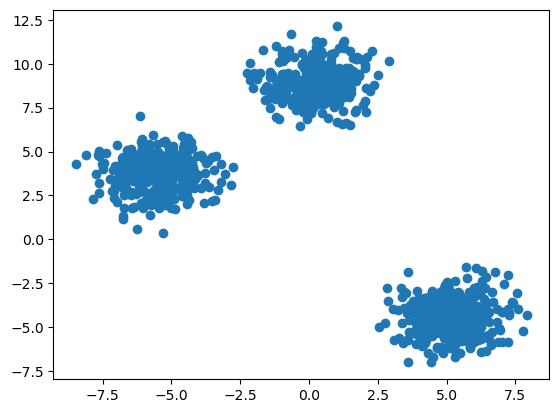

In [4]:
plt.scatter(X[ :,0], X[ :,1])

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [6]:
from sklearn.cluster import KMeans

In [7]:
## Manual Process

## Elbow Method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k , init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [8]:
wcss

[34827.57682552021,
 7935.4372861454185,
 1319.2730531585605,
 1140.4677884655127,
 992.6326991429293,
 853.8911094964394,
 754.4952771647166,
 673.8914366404393,
 578.0807873952374,
 536.1405314230223]

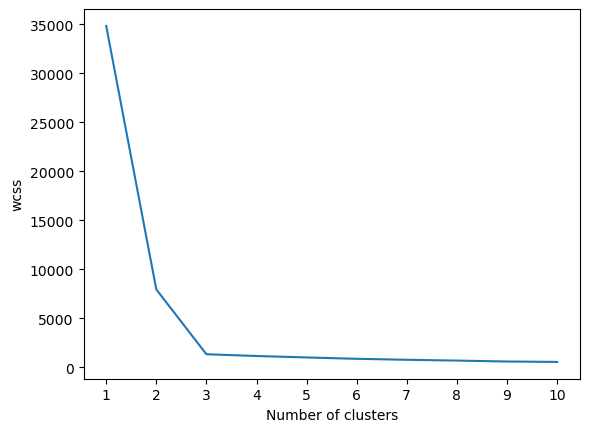

In [10]:
## Plot elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [11]:
kmeans=KMeans(n_clusters=3, init="k-means++")

In [12]:
y_labels=kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
y_test_label=kmeans.predict(X_test)

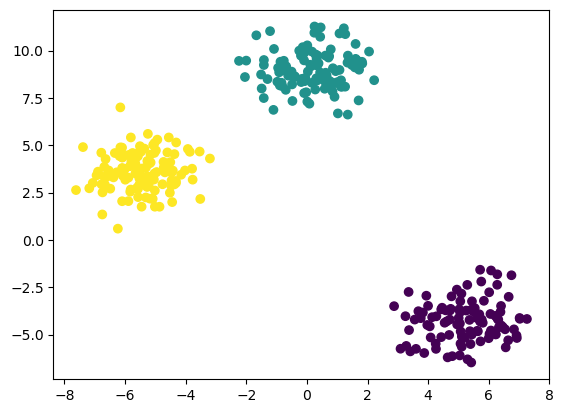

In [16]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_label)

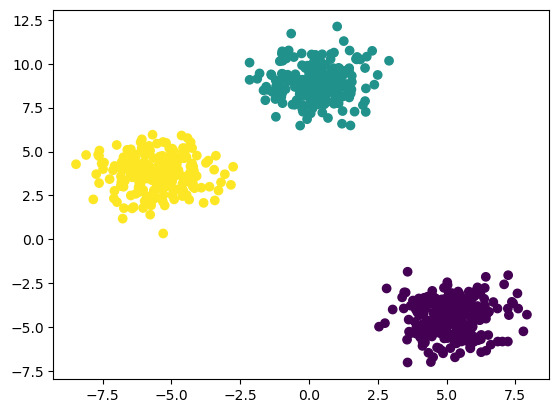

In [18]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)

In [19]:
 !pip install kneed

In [20]:
from kneed import KneeLocator

In [21]:
kl=KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')
kl.elbow

3

In [22]:
## For Performance Matrix
## Silhouette Score
from sklearn.metrics import silhouette_score

In [24]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init ="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [25]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49137731762633263,
 0.3340215240868913,
 0.34433360798297064,
 0.33119778744931627,
 0.34189011022674337,
 0.3390215188865479]

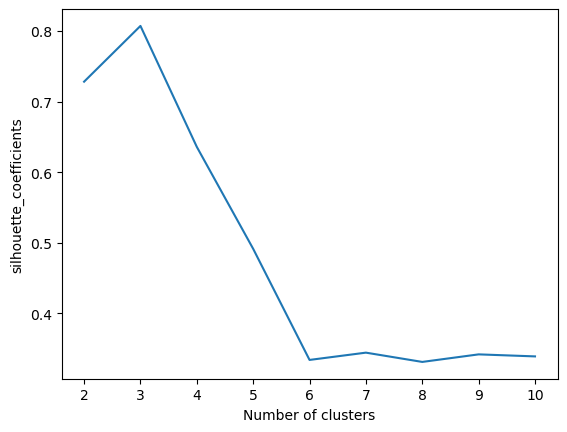

In [27]:
## Plotting silhouette_score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()